# Newlacto
> Stepping through the aPTR code for newlacto OTU table

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

from src.database import RnaDB
from src.torch_solver import TorchSolver

In [3]:
otus = pd.read_table(
    "../experiments/newlacto/aptr_ba26a61b-cce6-4047-b5e0-ff686d9f45f7/otu_table.tsv", 
    index_col=0
)


In [4]:
otus

,B100_S64_R,B102_S66_R,B103_S67_R,B104,B105_S69_R,B108,B110,B111,B113,B114,...,B90_S33_R,B91_S34_R,B92_S35_R,B93_S36_R,B94_S37_R,B95_S38_R,B96_S39_R,B97_S40_R,B98_S41_R,B99_S63_R
#OTU ID,,,,,,,,,,,,,,,,,,,,,
004aceaa0e06b6c506e4ff8f80005692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0491d60f93cf793d9de07ae6ae7764a1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0528819c8d0212ddca19ea9f1171334d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e93d24a367e66b5ae764a069374abbf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0f01c179704ca155342389a2a45708d1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15241bff62fb2f02c42f03ce87363b0c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16e12ef330aed554ccd6bb29e8b2af50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19c529c72bd56d16684ff458938e877d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1caa6c089e69c6d933d61ce7fe3b22ba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
rnadb = RnaDB(
    path_to_dnaA="../data/allDnaA.tsv",
    path_to_16s="../data/allSSU.tsv",
    # left_primer="TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGNGGCWGCAG",
    # right_primer="TCGTCGGCAGCGTCAGATGTGTATAAGAGACAGCCTACGGGNGGCWGCAG"
)

solver = TorchSolver(md5s=otus.index, otus=otus, db=rnadb)


In [97]:
solver.coverages.sum(axis=0)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000])

In [98]:
solver.train(lr=1e-1)

Epoch 0:	 0.0052938819862902164
Epoch 1:	 0.0052897753193974495
Epoch 2:	 0.005288784857839346
Epoch 3:	 0.005288403946906328
Epoch 4:	 0.005288223270326853
Epoch 5:	 0.005288128741085529
Epoch 6:	 0.005288075655698776
Epoch 7:	 0.005288043990731239
Epoch 8:	 0.00528802489861846
Epoch 9:	 0.005288011860102415
Epoch 10:	 0.005288004409521818
Epoch 11:	 0.0052879988215863705
Epoch 12:	 0.005287994630634785
Epoch 13:	 0.0052879913710057735
Epoch 14:	 0.00528798857703805
Epoch 15:	 0.005287987645715475
Epoch 16:	 0.005287985783070326
Epoch 17:	 0.005287984851747751
Epoch 18:	 0.005287983920425177
Epoch 19:	 0.005287982989102602
Epoch 20:	 0.005287982057780027
Epoch 21:	 0.005287981126457453
Epoch 22:	 0.005287981126457453
Epoch 23:	 0.005287980195134878
Epoch 24:	 0.005287979729473591
Epoch 25:	 0.005287979729473591
Epoch 26:	 0.0052879792638123035
Epoch 27:	 0.0052879792638123035
Epoch 28:	 0.005287978798151016
Epoch 29:	 0.005287978798151016
Epoch 30:	 0.005287978332489729
Epoch 31:	 0.0

(array([[-2.151472 , -2.151472 , -2.151472 , ..., -2.151472 , -2.151472 ,
         -2.151472 ],
        [-2.4883332, -2.4883332, -2.4883332, ..., -2.4299967, -2.4883332,
         -2.4883332],
        [-2.7674422, -2.7674422, -2.7674422, ..., -2.7674422, -2.7674422,
         -2.7674422],
        ...,
        [-1.4788489, -1.4788489, -1.4788489, ..., -1.4788489, -1.4788489,
         -1.4788489],
        [-2.7515657, -2.7515657, -2.7515657, ..., -2.7515657, -2.7515657,
         -2.7515657],
        [-2.4138467, -2.4138467, -2.4138467, ..., -2.4138467, -2.4138467,
         -2.4138467]], dtype=float32),
 array([[0.917398  , 0.917398  , 0.917398  , ..., 0.917398  , 0.917398  ,
         0.9173979 ],
        [0.94804347, 0.94804347, 0.94804347, ..., 0.9415023 , 0.94804347,
         0.94804347],
        [0.72992176, 0.72992176, 0.72992176, ..., 0.72992176, 0.72992176,
         0.72992176],
        ...,
        [1.0791771 , 1.0791771 , 1.0791771 , ..., 1.0791771 , 1.0791771 ,
         1.0791771 

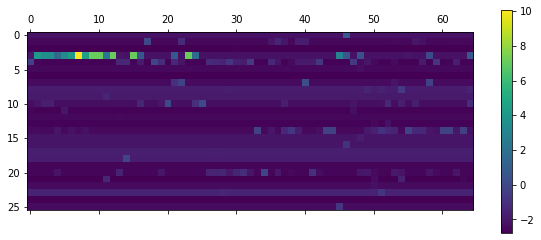

In [85]:
plt.matshow(solver.A_hat.detach())
plt.colorbar()

In [86]:
solver.B_hat

tensor([[0.9174, 0.9174, 0.9174,  ..., 0.9174, 0.9174, 0.9174],
        [0.9480, 0.9480, 0.9480,  ..., 0.9415, 0.9480, 0.9480],
        [0.7299, 0.7299, 0.7299,  ..., 0.7299, 0.7299, 0.7299],
        ...,
        [1.0792, 1.0792, 1.0792,  ..., 1.0792, 1.0792, 1.0792],
        [0.8281, 0.8281, 0.8281,  ..., 0.8281, 0.8281, 0.8281],
        [1.1669, 1.1669, 1.1669,  ..., 1.1669, 1.1669, 1.1669]],
       requires_grad=True)

In [25]:
genomes = rnadb.find_genomes_by_md5(otus.index)
len(genomes)

26

In [27]:
rnadb[genomes]["md5"]

,genome,n_contigs,contig,feature,16s_position,oor_position,size,16s_sequence,md5
65,891391.3,3,NC_015214,fig|891391.3.rna.16,447399,51,2097766,tttaaaatgagagtttgatcctggctcaggacgaacgctggcggcg...,19c529c72bd56d16684ff458938e877d
66,891391.3,3,NC_015214,fig|891391.3.rna.2,57091,51,2097766,tttaaaatgagagtttgatcctggctcaggacgaacgctggcggcg...,19c529c72bd56d16684ff458938e877d
67,891391.3,3,NC_015214,fig|891391.3.rna.73,1712822,51,2097766,tttaaaatgagagtttgatcctggctcaggacgaacgctggcggcg...,19c529c72bd56d16684ff458938e877d
68,891391.3,3,NC_015214,fig|891391.3.rna.48,469566,51,2097766,tttaaaatgagagtttgatcctggctcaggacgaacgctggcggcg...,bb6735009f0a9a49921f91be81c56efd
76,1076934.5,1,CP003025,fig|1076934.5.rna.1,16541,199,1975547,ggctcaggacgaacgctggcggcgtgcctaatacatgcaagtagaa...,47d6cb907cf0b499ddcd1b9305fdcbcd
...,...,...,...,...,...,...,...,...,...
7545,196627.14,1,NC_006958,fig|196627.14.rna.38,1480866,22,3282708,ggcggcgtgcttaacacatgcaagtcgaacgctgaaaccggagctt...,f0f1a1a443a4a58a6b49dfff4acb7731
7546,196627.14,1,NC_006958,fig|196627.14.rna.25,857624,22,3282708,ggcggcgtgcttaacacatgcaagtcgaacgctgaaaccggagctt...,5b58a253f72af65172ac4752b454dc70
7547,196627.14,1,NC_006958,fig|196627.14.rna.7,76679,22,3282708,ggcggcgtgcttaacacatgcaagtcgaacgctgaaaccagagctt...,1c6a44634f78bb3a444d44bdac52a4c6
7548,196627.14,1,NC_006958,fig|196627.14.rna.78,3123011,22,3282708,ggcggcgtgcttaacacatgcaagtcgaacgctgaaaccggagctt...,2fb59b65b4dd3d4e6873a23a27a16e09


In [21]:
solver.coverages.shape

torch.Size([31, 65])

In [23]:
solver.members.shape

torch.Size([142, 26])

In [24]:
solver.gene_to_seq.shape

torch.Size([106, 142])

In [90]:
inferred_abundances = pd.DataFrame(
    data=solver.A_hat.exp().detach().numpy(),
    index=solver.genome_ids,
    columns=solver.sample_ids,
)


In [91]:
inferred_abundances

,B100_S64_R,B102_S66_R,B103_S67_R,B104,B105_S69_R,B108,B110,B111,B113,B114,...,B90_S33_R,B91_S34_R,B92_S35_R,B93_S36_R,B94_S37_R,B95_S38_R,B96_S39_R,B97_S40_R,B98_S41_R,B99_S63_R
891391.3,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,...,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313,0.116313
1076934.5,0.083048,0.083048,0.083048,0.083048,0.083048,0.083048,0.083048,0.083048,0.083048,0.083048,...,0.083048,0.137694,0.111325,0.083048,0.083048,0.083048,0.083048,0.088037,0.083048,0.083048
195103.10,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,...,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822,0.062822
748671.3,0.154547,64.888191,38.357033,38.357033,6.054397,27.810820,64.888191,23984.134766,100.612846,1197.300049,...,0.128973,0.116102,0.116102,1.137143,0.116102,0.116102,0.116102,0.116102,0.116102,2.103336
300268.11,0.810985,0.076949,0.071987,0.071987,0.071987,0.071987,0.071987,0.071987,0.071987,0.071987,...,0.071987,0.071987,0.156614,0.071987,0.454222,0.071987,0.074979,0.180689,0.071987,0.071987
768486.3,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,...,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723,0.084723
691437.3,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,...,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409,0.064409
981540.3,0.091902,0.091902,0.091902,0.091902,0.091902,0.091902,0.091902,0.091902,0.091902,0.091902,...,0.091902,0.091902,0.091902,0.751234,0.091902,0.091902,0.091902,0.091902,0.091902,0.091902
1429851.3,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,...,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.179921,0.216888
1698.4,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,...,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356
